In [1]:
import pandas as pd
import numpy as np

In [2]:
#*******************************************************************************************************

In [3]:
data = pd.read_csv('./Unit3_data/data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
sub_area                                 30469 non-null object
preschool_quota                          23781 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_quota                             23784 non-null float64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
hospital_beds_raion                      16029 non-null float64
healthcare_centers_raion                 30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_e

### Задание 2.6.6
Загрузите данные *train.csv*, найдите признак, обозначающий штат. Затем найдите значение, которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся признак в переменную result.

In [5]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
result = vis_data.state.fillna(vis_data.state.mode()[0])

### Задание 2.6.7
Продолжим готовить к анализу наш **Data set**, посвященный квартирам, выставленным на продажу. Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов, и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение. Поступим здесь таким образом. Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные. Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

In [6]:
len(data.dropna())

13652

### Задание 2.8.3
Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации. Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). В качестве ответа укажите минимальное значение в получившемся нормализованном признаке. Ответ округлите до 5 знаков после запятой.

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
scaller = StandardScaler()

balance_due_st = scaller.fit_transform(vis_data[['balance_due']])
round(balance_due_st.min(),5)

-13.14733

### Задание 2.10.3
Загрузите данные train.csv, найдите признак, обозначающий баланс. Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих значений.

In [9]:
np.set_printoptions(suppress=True)

In [10]:
sqrt_positive_balance = np.sqrt(vis_data.balance_due[vis_data.balance_due>0])
ans = abs(sqrt_positive_balance.median() - sqrt_positive_balance.mean())

ans

0.4525960609393067

## Практика на реальных данных
Вернемся к первичному анализу наших данных по квартирам, выставленным на продажу. Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах : **"Лефортово", "Перово", "Басманное" и "Богородское"**. Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать визуализацию с помощью боксплотов. Постройте боксплоты для распределения цен по этим районами (должно получиться четыре боксплота - по одному для каждого района). На основании полученных диаграмм ответьте на вопросы ниже.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sa_to_research = ['Basmannoe','Bogorodskoe','Lefortovo','Perovo']

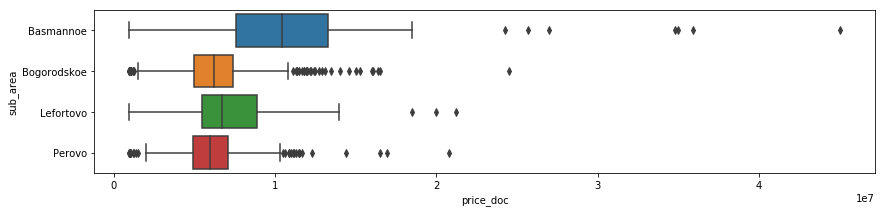

In [13]:
plt.figure(figsize=(14,3))
sns.boxplot(x='price_doc', y=data.sub_area, data=data,order=sa_to_research);

### Задание 2.12.6
Загрузите данные train.csv, найдите признак, обозначающий баланс и признак, обозначающий размер скидки. Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите номер признака, который содержит максимальное среднее значение.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
pf = PolynomialFeatures(3)

In [16]:
poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])
ans = poly_features.mean(axis=0).argmax()+1
ans

7

### Задание 2.12.7
Загрузите данные train.csv, найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа.
Выходными считаются дни под номерами 5 и 6.

In [17]:
ans = (pd.to_datetime(vis_data.ticket_issued_date).dt.weekday >4).sum()
ans

1620

## Практика на реальных данных
Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения : ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы. 

Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.).

Для этого необходимо:

 создать словарь, , сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent' соответственно
 заменить значения в колонке ecology на заданные нами выше с помощью метода .replace :
```python
data.ecology = data.ecology.replace(to_replace=ecology_dict)
```
Теперь необходимо разобраться с переменной, содержащей информацию о районе.  Для этого воспользуйтесь методом get_dummies

In [18]:
ecology_dict = {'no data':0,
                'poor':1,
                'satisfactory':2,
                'good':3,
                'excellent':4}

data.ecology = data.ecology.replace(to_replace=ecology_dict)

In [19]:
new_data = pd.concat([data.drop(columns='sub_area'),pd.get_dummies(data.sub_area)], axis=1)

### Задание 2.12.8
Сколько теперь признаков в датасете после перекодировки?

In [20]:
len(new_data.columns)

201

Найдите среднее арифметическое для признака "Экология". Округлите до сотых

In [21]:
round(new_data.ecology.mean(),2)

1.73

### Задание 2.14.5
Загрузите данные train.csv, найдите признак, обозначающий баланс. Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. Найдите модуль разницы между минимальным и максимальным выбросом.

In [22]:
def iqr_thresholds(column, n = 1.5):
    '''
    вычисление границ интервала [percentile(25) - 1.5*IQR : percentile(75) + 1.5*IQR]
    где де IQR = percentile(75) - percentile(25)
    
    column: последовательность числовых элементов
        обьект для расчета границ интервала
    n: float, по умолчанию 1,5
        коэфициент при IQR
    '''
    iqr = column.quantile(0.75) - column.quantile(0.25)
    l_threshold = column.quantile(0.25) - n*iqr
    r_threshold = column.quantile(0.75) + n*iqr
    return l_threshold,r_threshold

In [23]:
notna_balance = vis_data.balance_due.dropna()
l,r = iqr_thresholds(notna_balance)

outl = notna_balance[np.where((notna_balance<l) | (notna_balance>r))[0]]

In [24]:
outl.max() - outl.min()

18780.0